---
* *** 원본 소스는 홍콩과기대 김성훈 교수님의  [Github link](https://github.com/hunkim/DeepLearningZeroToAll)를 참조하세요 ***     
* *** Watson studio notebook 에서 작업 가능하도록 수정하였으며***
* *** 한글로 설명된 부분은 제가 스터디 하면서 이해한 내용을 추가한 것입니다. ***
---

* ***초기화값을 적절하게 정의해서 시작하면, 정확도가 매우 올라갑니다. ***
* ***xavier 초기화 함수를 사용해 봅니다. ***

In [2]:
# Lab 10 MNIST and Xavier
import tensorflow as tf
import random
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

* ***xavier 초기화 함수를 사용함***

In [3]:
# weights & bias for nn layers
# http://stackoverflow.com/questions/33640581/how-to-do-xavier-initialization-on-tensorflow
W1 = tf.get_variable("W1", shape=[784, 256], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.get_variable("W2", shape=[256, 256], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.get_variable("W3", shape=[256, 10], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2, W3) + b3

In [4]:
# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits( logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [5]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Epoch: 0001 cost = 0.315082912
Epoch: 0002 cost = 0.115140875
Epoch: 0003 cost = 0.075245137
Epoch: 0004 cost = 0.052740179
Epoch: 0005 cost = 0.040237784
Epoch: 0006 cost = 0.030997383
Epoch: 0007 cost = 0.025295666
Epoch: 0008 cost = 0.020105720
Epoch: 0009 cost = 0.016186265
Epoch: 0010 cost = 0.0

* ***앞에 lab 에서 softmax 는 90%는  NN은 94% 정도의 정확도를 보여주었습니다.***

In [6]:
# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))

Accuracy: 0.9787


* ***sample 을 random 하게 가져와서 그림으로 보여주고 예측합니다. ***

Label:  [5]
Prediction:  [5]


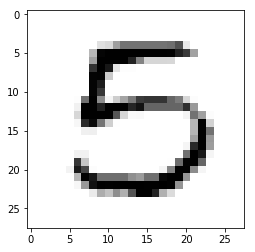

In [37]:
# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

plt.imshow(mnist.test.images[r:r + 1].
           reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

In [ ]:
'''
Epoch: 0001 cost = 0.301498963
Epoch: 0002 cost = 0.107252513
Epoch: 0003 cost = 0.064888892
Epoch: 0004 cost = 0.044463030
Epoch: 0005 cost = 0.029951642
Epoch: 0006 cost = 0.020663404
Epoch: 0007 cost = 0.015853033
Epoch: 0008 cost = 0.011764387
Epoch: 0009 cost = 0.008598264
Epoch: 0010 cost = 0.007383116
Epoch: 0011 cost = 0.006839140
Epoch: 0012 cost = 0.004672963
Epoch: 0013 cost = 0.003979437
Epoch: 0014 cost = 0.002714260
Epoch: 0015 cost = 0.004707661
Learning Finished!
Accuracy: 0.9783
'''